<a href="https://colab.research.google.com/github/SELips/Income_inequality/blob/main/Income_inequality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%reload_ext google.colab.data_table

#load in datasets
df_gini = pd.read_csv("https://raw.githubusercontent.com/SELips/Income_inequality/main/economic-inequality-gini-index.csv")
df_gdp = pd.read_csv("https://raw.githubusercontent.com/SELips/Income_inequality/main/gdp-per-capita-maddison-2020.csv") 

#rename columns, merge dataframes and drop irrelevante columns
df = pd.merge(df_gdp, df_gini,  how='left', left_on=['Code','Year'], right_on = ['Code','Year'])
df.drop(columns=['417485-annotations','Entity_y'],inplace =True)
df.rename(columns={"GDP per capita":"GDP_per_capita", "Gini coefficient":"Gini_coef", "Entity_x":"Entity"},inplace=True)
df.dropna(subset=['Gini_coef'],inplace=True)
#check dataframe
df


,Entity,Code,Year,GDP_per_capita,Gini_coef
121,Albania,ALB,1996,3965.685303,0.270103
127,Albania,ALB,2002,5608.962402,0.317390
130,Albania,ALB,2005,6858.466797,0.305957
133,Albania,ALB,2008,8522.129883,0.299847
137,Albania,ALB,2012,9592.000000,0.289605
...,...,...,...,...,...
20173,Zambia,ZMB,2006,2133.593994,0.546175
20177,Zambia,ZMB,2010,3032.067871,0.556215
20182,Zambia,ZMB,2015,3478.000000,0.571361
20247,Zimbabwe,ZWE,2011,1515.000000,0.431536


In [118]:
#Correlation between all GDP and Gini indexes. 
#This does not take cultural, spatial, socio-economic or development differences into account. 
df_relation = df[['Gini_coef','GDP_per_capita']]
df_relation.corr().iloc[0::2,-1]

Gini_coef   -0.354956
Name: GDP_per_capita, dtype: float64

Very strong negative relation (r = -1 to -0.8) = 28 countries
Strong negative relation (r = -0.8 to -0.6) = 20 countries
Relatively strong negative relation (r = -0.6 to -0.4) = 15 countries
Negligible to moderate negative relation (r = -0.4 to 0) = 28 countries

Negligible to moderate positive relation (r = 0 to 0.4) = 23 countries
Relatively strong positive relation (r = 0.4 to 0.6) = 11 countries
Strong positive relation (r = 0.6 to 0.8)= 12 countries
Very strong positive relation (r = 0.8 to 1.0) = 12 countries



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b482a5cd0>]],
      dtype=object)

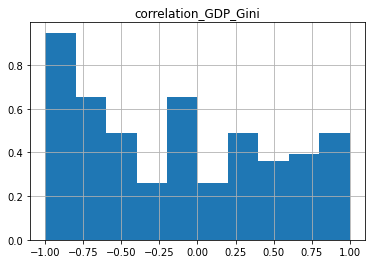

In [106]:
#Grouping by countries and then calculating the correlation should give a better idea whether there is a correlation or not.
countries_grouped_relation = df.groupby('Entity')[['Gini_coef','GDP_per_capita']].corr().unstack().iloc[:,1]
countries_grouped_relation_df = countries_grouped_relation.to_frame()
correlation_GDP_Gini = countries_grouped_relation_df.droplevel(level=0, axis=1)
correlation_GDP_Gini.rename(columns={'GDP_per_capita':'correlation_GDP_Gini'}, inplace = True)
correlation_GDP_Gini.dropna(subset=['correlation_GDP_Gini'],inplace=True)

#fact calculations
very_strong_negative =correlation_GDP_Gini.correlation_GDP_Gini.agg(lambda s: s.between(-1, -0.8).sum())
strong_negative =correlation_GDP_Gini.correlation_GDP_Gini.agg(lambda s: s.between(-0.8, -0.6).sum())
relatively_strong_negative =correlation_GDP_Gini.correlation_GDP_Gini.agg(lambda s: s.between(-0.6, -0.4).sum())

very_strong_positive =correlation_GDP_Gini.correlation_GDP_Gini.agg(lambda s: s.between(0.8, 1).sum())
strong_positive =correlation_GDP_Gini.correlation_GDP_Gini.agg(lambda s: s.between(0.6,0.8 ).sum())
relatively_strong_positive =correlation_GDP_Gini.correlation_GDP_Gini.agg(lambda s: s.between(0.4,0.6).sum())

negligible_to_moderate_positive =correlation_GDP_Gini.correlation_GDP_Gini.agg(lambda s: s.between(0.0,0.4).sum())
negligible_to_moderate_negative =correlation_GDP_Gini.correlation_GDP_Gini.agg(lambda s: s.between(-0.4,0 ).sum())

print(f'Very strong negative relation (r = -1 to -0.8) = {very_strong_negative} countries\nStrong negative relation (r = -0.8 to -0.6) = {strong_negative} countries\n\
Relatively strong negative relation (r = -0.6 to -0.4) = {relatively_strong_negative} countries\nNegligible to moderate negative relation (r = -0.4 to 0) = {negligible_to_moderate_negative} countries\n\
\nNegligible to moderate positive relation (r = 0 to 0.4) = {negligible_to_moderate_positive} countries\nRelatively strong positive relation (r = 0.4 to 0.6) = {relatively_strong_positive} countries\n\
Strong positive relation (r = 0.6 to 0.8)= {strong_positive} countries\nVery strong positive relation (r = 0.8 to 1.0) = {very_strong_positive} countries\n')

correlation_GDP_Gini.hist(column='correlation_GDP_Gini', density = True, bins = 10)

Er zijn 40 landen waarbij er een hele sterke relatie is tussen GDP en de Gini index, waarvan 28 een negatieve relatie en 12 een positieve relatie hebben. Aangezien de landen gegroepeerd zijn per land gaat deze correlatie tussen de jaren en de Gini index per land. Een hele sterke relatie duidt dus vooral op consistentie door de jaren heen voor een land tussen GDP en de Gini. Er is een lichte neiging naar meer negatieve relaties, dus hogere GDP, lagere inequality. 

Kijkend naar de totale relatie tussen GDP en inkomensongelijkheid is de r -0.35. Dit houdt een moderate negatieve relatie in.

Omdat we nu maar naar twee factoren kijken wordt deze vraag denk ik te plat geslagen om goed te kunnen beantwoorden. Ik heb de vraag nu beantwoord per land maar misschien is er een nog duidelijker relatie zichtbaar als ik zou groeperen per cultuur, socio-economisch niveau, ontwikkeling, religie of continent. 

